In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_pickle('dataset2.pkl')
#conda activate wp

In [2]:
data.describe()
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171940 entries, 0 to 1171939
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   transcript_id        1171940 non-null  object 
 1   transcript_position  1171940 non-null  object 
 2   sequence             1171940 non-null  object 
 3   dwell_time           1171940 non-null  float64
 4   sd                   1171940 non-null  float64
 5   mean                 1171940 non-null  float64
 6   m1_seq               1171940 non-null  object 
 7   m1_dtime             1171940 non-null  float64
 8   m1_sd                1171940 non-null  float64
 9   m1_mean              1171940 non-null  float64
 10  p1_seq               1171940 non-null  object 
 11  p1_dtime             1171940 non-null  float64
 12  p1_sd                1171940 non-null  float64
 13  p1_mean              1171940 non-null  float64
dtypes: float64(9), object(5)
memory usage: 125.2+ MB


,transcript_id,transcript_position,sequence,dwell_time,sd,mean,m1_seq,m1_dtime,m1_sd,m1_mean,p1_seq,p1_dtime,p1_sd,p1_mean
0,tx_id_0,0,AAACC,0.00337,4.56,102.0,AAAAC,0.01220,3.99,106.0,AACCU,0.00664,4.20,84.2
1,tx_id_0,0,AAACC,0.00443,2.36,102.0,AAAAC,0.03020,2.32,107.0,AACCU,0.00332,2.13,79.2
2,tx_id_0,0,AAACC,0.00664,7.04,99.3,AAAAC,0.00232,5.55,110.0,AACCU,0.00232,2.21,86.6
3,tx_id_0,0,AAACC,0.00996,3.90,108.0,AAAAC,0.00465,2.10,104.0,AACCU,0.00401,2.18,82.2
4,tx_id_0,0,AAACC,0.00531,3.80,101.0,AAAAC,0.02110,3.49,103.0,AACCU,0.00997,2.18,81.2




#some questions to be answered:

Basic counts: 

1. which sequences have the highest counts? 

2. which transcript_positions have the highest counts? 

3. which gene_ids have the highest counts of label1? (not for dataset1-3）

4. can we get a heatmap to see what are the relationships among the predictors? 



About sequences:

1. how many are there? 

2. Compare the mean dwell time&other metrics? 
    is there any relationship between? 

3. what is the proportion of modification? 



About modified vs unmodified: (not for dataset1-3 ）

1. what are the metric differences at -1, 0, 1? 







Which sequences have highest counts? 

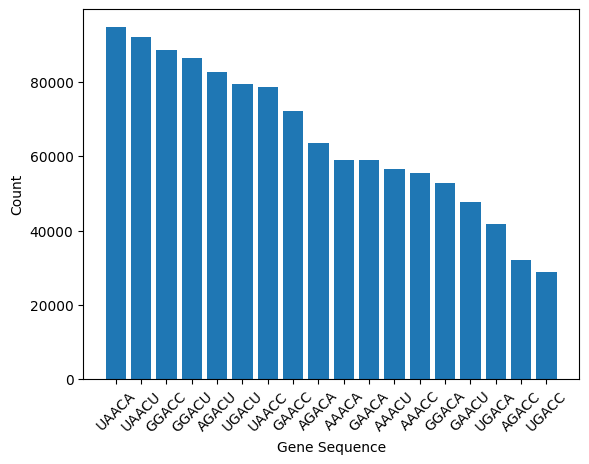

In [3]:
sequence_groups = data.groupby('sequence')
sequence_stats = sequence_groups.size().reset_index(name='counts').sort_values(by='counts', ascending=False)
plt.bar(sequence_stats['sequence'], sequence_stats['counts'])
plt.xlabel('Gene Sequence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In Frequencies: 

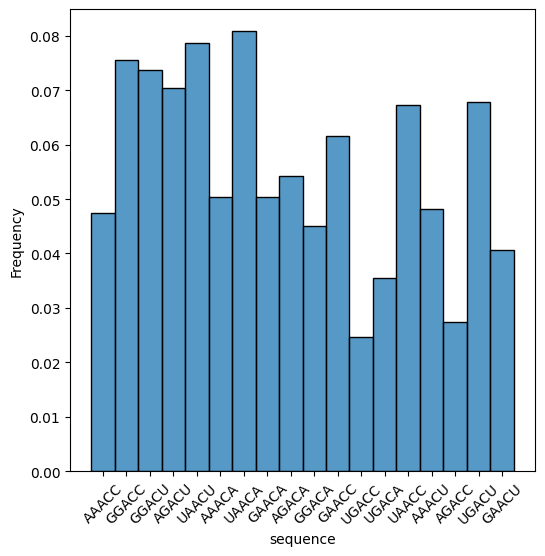

In [4]:
plt.figure(figsize=(6, 6)) 
sns.histplot(x='sequence',data=data,stat="probability")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

Numerical features comparison among the sequences: 

   sequence  dwell_time_average  mean_average  sd_average  dwell_time_std  \
0     AAACA            0.007297     98.250892    3.290271        0.004636   
1     AAACC            0.007198     98.348721    3.813068        0.004444   
2     AAACU            0.007431    105.349963    3.111773        0.004932   
3     AGACA            0.010253    121.149295    6.362485        0.006503   
4     AGACC            0.009528    124.162806    5.308497        0.005760   
5     AGACU            0.009413    127.914489    4.942332        0.005461   
6     GAACA            0.007080     95.093621    4.292089        0.004461   
7     GAACC            0.006303     94.239854    4.252427        0.003649   
8     GAACU            0.006910    101.058014    4.034170        0.004198   
9     GGACA            0.009042    113.517841    6.951540        0.006194   
10    GGACC            0.009053    116.090426    6.762967        0.006425   
11    GGACU            0.009397    121.618299    5.386603        0.006074   

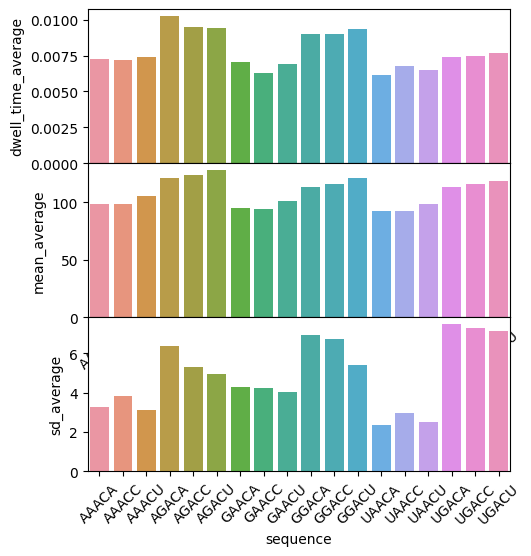

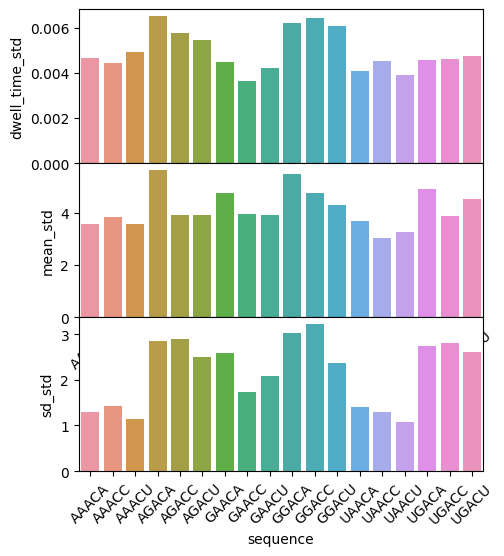

In [5]:

from matplotlib import gridspec

# Create a custom color palette for the labels
sequences_groups = data.groupby(['sequence'])
means=sequences_groups[['dwell_time','mean','sd']].mean()
variances=sequences_groups[['dwell_time','mean','sd']].std()
joined_data=means.join(variances,lsuffix='_average',rsuffix='_std').reset_index()
print(joined_data)
# Create a figure and gridspec

fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(3, 2, height_ratios=[3, 3, 3], width_ratios=[2, 2])
ax0 = plt.subplot(gs[0,0])
sns.barplot(x='sequence',y='dwell_time_average',data=joined_data)
plt.xticks(rotation=45)

ax1 = plt.subplot(gs[1,0])
sns.barplot(x='sequence',y='mean_average',data=joined_data)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=45)

ax2 = plt.subplot(gs[2,0])
sns.barplot(x='sequence',y='sd_average',data=joined_data)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.0)
plt.show()

fig = plt.figure(figsize=(12, 6)) 

ax3 = plt.subplot(gs[0,1])
sns.barplot(x='sequence',y='dwell_time_std',data=joined_data)
plt.xticks(rotation=45)

ax4 = plt.subplot(gs[1,1])
sns.barplot(x='sequence',y='mean_std',data=joined_data)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(rotation=45)

ax5 = plt.subplot(gs[2,1])
sns.barplot(x='sequence',y='sd_std',data=joined_data)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.0, wspace=0.3)
plt.show()
